## Building the Perceptron Classifier

For the initial implementation, I'll be focusing on binary classification with the Perceptron. I could expand this to handle multi-class classification through the one-vs-rest (OvR) method in the future if required.

**What is a Typical Perceptron Model? What would we need?**

- **Hyperparameters**: Hyperparameters are set before training begins and guide the training process. For the Perceptron, we are dealing with two main hyperparameters:
  - The **learning rate**, which influences the magnitude of weight adjustments during training.
  - The **number of epochs**, or how many times we'll loop through our training dataset. This acts as a stopping criterion, particularly important if our features aren't linearly separable, to avoid endlessly updating weights.

- **Parameters**: Parameters are learned from the data during training. These include the **weights** and **bias** of our model, which are adjusted through training to improve prediction accuracy.

- **Training Loop & Evaluation**: A structured training loop is essential. It allows for the iterative adjustment of our model's parameters. Equally critical is having a mechanism for making predictions and evaluating their accuracy, which helps in fine-tuning our model's performance.

- **Weight Update Mechanism**: We need a solid strategy for updating the model's weights based on the evaluation of its predictions, ensuring continuous improvement in its performance.

In [57]:
# Hyperparameters or Tuning Parameters for the model.
eta = 0.01
epochs = 50

##Parameters for the model are Weight and Bias.
##The Size (or Shape rather as we are dealing with Vector and Matrices) of the weight and Bias would depend on the Shape of the Input feature.

##For First Example, Let's start with the classic Iris Flower dataset. In this dataset, we have 4 Input features and a Flower label as the Target Variable.

### In this steps, let's load the dataset and then initialize the parameters.

In [58]:
import pandas as pd

Iris_dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', Iris_dataset_url)
data = pd.read_csv(Iris_dataset_url,
                header=None,
                encoding='utf-8')

print(data.head())

print(data[4].unique())

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [59]:
print("Unique species before dropping 'Iris-versicolor':", data[4].unique())
data = data[data[4] != 'Iris-versicolor']
print("Unique species after dropping 'Iris-versicolor':", data[4].unique())
print("NaN values present in 'Species':", data[4].isnull().any())


Unique species before dropping 'Iris-versicolor': ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Unique species after dropping 'Iris-versicolor': ['Iris-setosa' 'Iris-virginica']
NaN values present in 'Species': False


## Now, let's visualize the data that we have so far

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


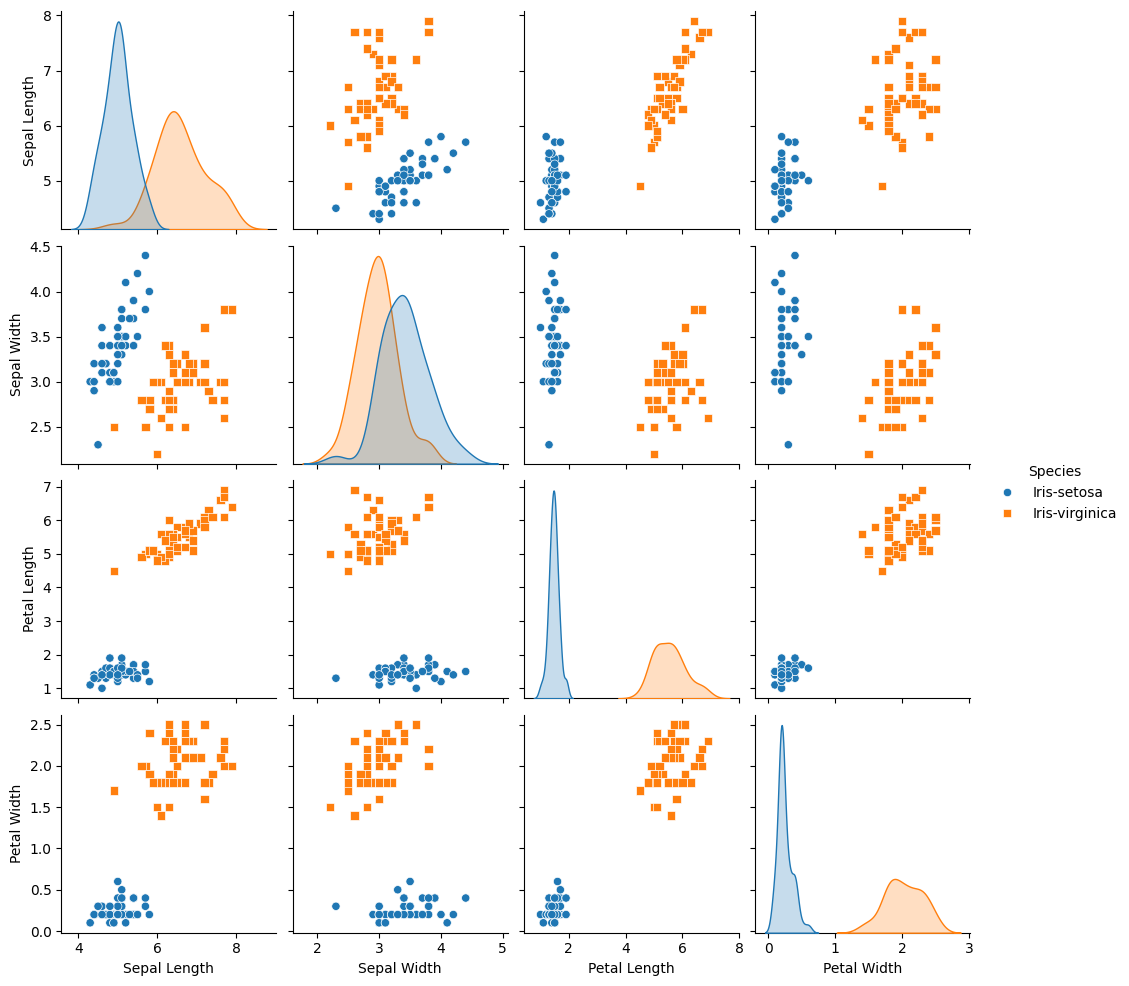

In [60]:
import seaborn as sns
import numpy as np
print (data.head())
data.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

sns.pairplot(data, hue='Species', markers=["o", "s"])

## So Now that we have a general Idea on how our dataset looks, how the different features are distributed. Let's Start with the parameters for the Perceptron model.

### We'll need to create the weight of similar shape as the input features.

In [61]:
# the last column 'Species' is the target variable.
X = data.iloc[:, :-1].values  # all columns except the last one will be taken as the features
y = data.iloc[:, -1].values  # only the last column is the target variable

###We'll also need to assign the (this is referred as Encoding) target labels into binary form, 0 and 1. we can use a LabelEncoder from sklearn library or a simple mapping

In [62]:
from sklearn.preprocessing import LabelEncoder

# Let's Convert 'Iris-setosa' to 0 and 'Iris-virginica' to 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


### here for the initialization purpose of the variable we will use a random number generator. random number generators are useful for the reproducibility of our models.

###

In [63]:
rgen = np.random.default_rng(seed=1)

weight = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Add 1 for the bias weight
bias = np.float_(0.)

In [65]:
def net_input(X, weight, bias):
    """Calculate the net input (weighted sum plus bias)."""
    return np.dot(X, weight) + bias

def predict(X, weight, bias):
    """Return class label after unit step."""
    return np.where(net_input(X, weight, bias) >= 0.0, 1, 0)


In [66]:
def fit(X, y, eta, epochs):
    """Fit training data."""
    rgen = np.random.RandomState(1)
    weight = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    bias = np.float_(0.)
    errors = []

    for _ in range(epochs):
        err = 0
        for xi, target in zip(X, y):
            output = predict(xi, weight[1:], bias)
            update = eta * (target - output)
            weight[1:] += update * xi
            weight[0] += update
            err += int(update != 0.0)
        errors.append(err)
    return weight, bias, errors




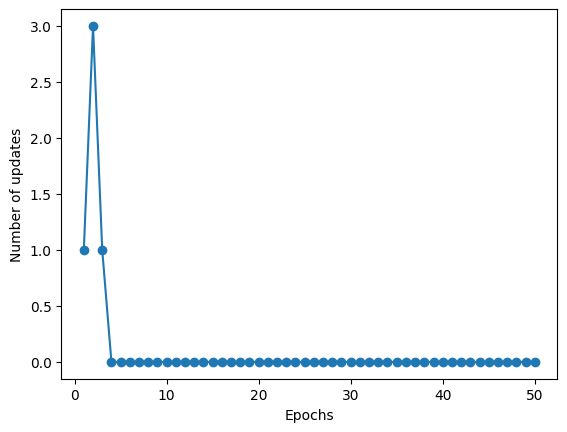

In [67]:
import matplotlib.pyplot as plt

weight, bias, errors = fit(X, y, eta, epochs)
# Now plot the error history
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [68]:
 print(weight)

[ 0.00624345 -0.03111756 -0.03928172  0.06727031  0.05265408]


In [48]:
X = X[:, [0, 2]]


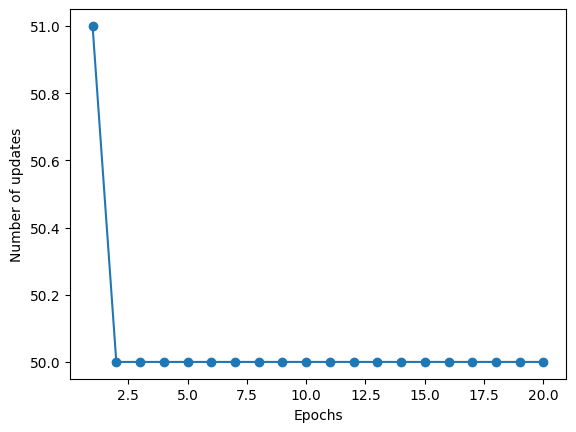

In [51]:
import matplotlib.pyplot as plt

weight, bias, errors = fit(X, y, eta, epochs)
# Now plot the error history
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()